# Processamento de Linguagem Natural com Python

## Importação das bibliotecas

In [1]:
import urllib.request
import bs4 as bs
import spacy

## Carregamento do texto

In [2]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [3]:
dados_html = bs.BeautifulSoup(dados, 'lxml')

In [4]:
paragrafos = dados_html.find_all('p') # Seleciona apenas os parágrafos do texto HTML (tag 'p')

In [5]:
# Concatena todos os parágrafos formando um texto
texto = ''
for p in paragrafos:
    texto += p.text
texto = texto.lower() # transforma todo o texto em letras minúsculas

## Realizando busca no texto utilizando spaCy

In [6]:
pln = spacy.load("pt_core_news_lg")

In [7]:
palavra = 'máquina'  # palavra que será buscada
token_pesquisa = pln(palavra)

In [8]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [9]:
doc = pln(texto)
matches = matcher(doc)
matches
# ID - Posição inicial - Posição final

[(8661325627334373315, 972, 973),
 (8661325627334373315, 1012, 1013),
 (8661325627334373315, 1035, 1036),
 (8661325627334373315, 1120, 1121),
 (8661325627334373315, 1494, 1495),
 (8661325627334373315, 1853, 1854),
 (8661325627334373315, 2807, 2808),
 (8661325627334373315, 3118, 3119),
 (8661325627334373315, 3186, 3187),
 (8661325627334373315, 3194, 3195),
 (8661325627334373315, 3216, 3217),
 (8661325627334373315, 3240, 3241),
 (8661325627334373315, 3277, 3278),
 (8661325627334373315, 3356, 3357),
 (8661325627334373315, 3390, 3391),
 (8661325627334373315, 3663, 3664),
 (8661325627334373315, 3752, 3753),
 (8661325627334373315, 3851, 3852),
 (8661325627334373315, 3877, 3878),
 (8661325627334373315, 3891, 3892),
 (8661325627334373315, 4388, 4389),
 (8661325627334373315, 4570, 4571),
 (8661325627334373315, 5067, 5068),
 (8661325627334373315, 5607, 5608),
 (8661325627334373315, 5983, 5984),
 (8661325627334373315, 6109, 6110),
 (8661325627334373315, 6440, 6441),
 (8661325627334373315, 6862, 6

In [10]:
# mostrando o conteúdo da pesquisa na posição retornada
print(doc[972:973])

# mostrando o conteúdo da pesquisa na posição retornada (5 tokens antes da palavra pesquisada, 5 tokens depois da palavra pesquisada)
print(doc[972-5:973+5])

máquina
do adversário em desafiar a máquina seria necessário aparentar fragilidade e


In [11]:
print(matches[0]) #retorna o primeiro resultado da pesquisa (ID- Pos.Inicial - Pos.Final)
print(matches[0][1]) # retorna a posição inicial do primeiro resultado da pesquisa
print(matches[0][2]) # retorna a posição final do primeiro resultado da pesquisa

(8661325627334373315, 972, 973)
972
973


In [12]:
# visualizando resultados da pesquisa (utilizando HTML)

from IPython.core.display import HTML
trecho = ''
numero_palavras = 50    # qtd de palavras que serão mostradas que estão antes e depois da palavra pesquisa
doc = pln(texto)
matches = matcher(doc)

display(HTML(f'<h1>{palavra.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0: #se palavra pesquisada estiver no ińicio 
        inicio = 0
    trecho += str(doc[inicio:i[2] + numero_palavras]).replace(palavra, f"<mark>{palavra}</mark>")
    trecho += "<br /><br />"
display(HTML(f"""... {trecho} ... """))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto
- Siglas: https://spacy.io/api/annotation#named-entities

In [13]:
for entidade in doc.ents: 
    print(entidade.text, entidade.label_)   # mostra lista de todas as entidades encontradas, juntamente com sua label

andreas kaplan PER
michael haenlein PER
john mccarthy PER
darmouth colege PER
gubern LOC
román LOC
eros LOC
cotidiano).[4 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan turing,[5 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
cassino MISC
google ORG
wikipedia MISC
john mccarthy PER
conferência de dartmouth MISC
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
gps MISC
newell MISC
gps MISC
rn LOC
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
mccarty MISC
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth LOC
scruffies MISC
neats MISC
scruffies MISC
defense advanced research projects agency MISC
estados unidos LOC
fifth generation project MISC
japão LOC
john haugeland PER
gofai ORG
good old-fashioned artificial intel

In [14]:
# destaca no texto as entidades encontradas, juntamente com sua label 
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Criando uma Nuvem de palavras (Wordcloud)

In [15]:
from spacy.lang.pt.stop_words import STOP_WORDS 
import string
stop_words = STOP_WORDS #Palavras que não precisam estar na nuvem 
pontuacoes = string.punctuation #lista de pontuações

In [16]:
# adicionando cada palavra do texto em uma lista de strings - excluindo as STOP WORDS, pontuações e artigos
doc = pln(texto)
lista_token = []
for token in doc: 
    if token.text not in stop_words and token.text not in pontuacoes and token.pos_ != 'DET' and token.pos_ != 'CCONJ':
        lista_token.append(token.text) 

In [17]:
# Definindo o mapa de cor para a nuvem de palavras
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [18]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 70, colormap=color_map)

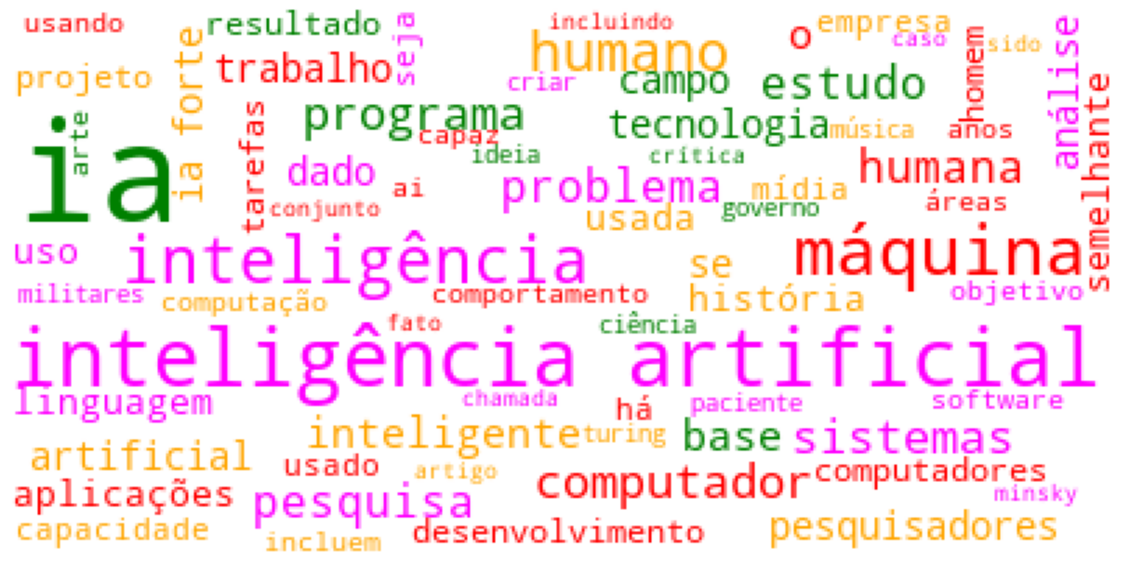

In [19]:
# Definindo características do plot
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(lista_token)) #Pega cada palavra em cada posição da lista de tokens
plt.figure(figsize=(20,20))
plt.imshow(cloud)
plt.axis('off')
plt.show()